In [12]:
import os
import cv2
from ultralytics import YOLO

# Load the YOLO model
model = YOLO('C:/Users/chira/Desktop/best_best_2/train_tuned/weights/best.pt')

input_folder =  'C:/Users/chira/Desktop/best_best/test_2/images'
output_folder = 'C:/Users/chira/Desktop/best_best/output_2'

# Ensure output directory exists
os.makedirs(output_folder, exist_ok=True)

# Set confidence threshold
conf_threshold = 0.5  # Confidence threshold for detection

# Process each file in the input folder
for file_name in os.listdir(input_folder):
    file_path = os.path.join(input_folder, file_name)

    # Handle image files
    if file_name.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tif', '.tiff')):
        img = cv2.imread(file_path)
        if img is None:
            print(f"Could not read image {file_name}. Skipping...")
            continue

        # Perform inference
        results = model(img)

        # Initialize counter for persons detected
        person_count = 0

        # Collect predictions and draw bounding boxes
        for box in results[0].boxes:
            if box.conf[0] >= conf_threshold:
                class_id = int(box.cls[0])
                if class_id == 0:  # Class for 'person'
                    person_count += 1
                    x1, y1, x2, y2 = map(int, box.xyxy[0])
                    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green box
                    cv2.putText(img, f'Person {person_count}', (x1, y1 - 10),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        # Display the total count on the image
        cv2.putText(img, f'Total People: {person_count}', (10, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
        
        # Save the processed image
        output_img_path = os.path.join(output_folder, file_name)
        cv2.imwrite(output_img_path, img)
        print(f"{file_name}: {person_count} people detected")

    # Handle video files
    elif file_name.lower().endswith(('.mp4', '.avi', '.mov', '.mkv')):
        cap = cv2.VideoCapture(file_path)
        if not cap.isOpened():
            print(f"Could not read video {file_name}. Skipping...")
            continue

        # Define the video writer
        fourcc = cv2.VideoWriter_fourcc(*'mp4v')
        output_video_path = os.path.join(output_folder, file_name)
        fps = int(cap.get(cv2.CAP_PROP_FPS))
        frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
        out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            # Perform inference
            results = model(frame)

            # Initialize counter for persons detected
            person_count = 0

            # Collect predictions and draw bounding boxes
            for box in results[0].boxes:
                if box.conf[0] >= conf_threshold:
                    class_id = int(box.cls[0])
                    if class_id == 0:  # Class for 'person'
                        person_count += 1
                        x1, y1, x2, y2 = map(int, box.xyxy[0])
                        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green box
                        cv2.putText(frame, f'Person {person_count}', (x1, y1 - 10),
                                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

            # Display the total count on the frame
            cv2.putText(frame, f'Total People: {person_count}', (10, 30),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

            # Write the frame to the output video
            out.write(frame)

        cap.release()
        out.release()
        print(f"{file_name} processed and saved.")
    else:
        print(f"Unsupported file type for {file_name}. Skipping...")

print("Processing complete.")


0: 416x640 265 persons, 95.6ms
Speed: 1.8ms preprocess, 95.6ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 640)
1.png: 81 people detected

0: 480x640 76 persons, 94.3ms
Speed: 5.0ms preprocess, 94.3ms inference, 2.6ms postprocess per image at shape (1, 3, 480, 640)
10.jpg: 57 people detected

0: 480x640 49 persons, 88.0ms
Speed: 3.5ms preprocess, 88.0ms inference, 4.9ms postprocess per image at shape (1, 3, 480, 640)
11_jpg.rf.cc96703ab67c2e5ffd08839d90d53c4d.jpg: 28 people detected

0: 480x640 41 persons, 91.1ms
Speed: 2.1ms preprocess, 91.1ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)
12_jpg.rf.2d5f5f0ce9d226bd3a7f41e49ccd9274.jpg: 22 people detected

0: 384x640 41 persons, 74.2ms
Speed: 1.1ms preprocess, 74.2ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)
13_mp4-0000_jpg.rf.775f73bef1a4621d846e0a62147a0cbb.jpg: 29 people detected

0: 384x640 45 persons, 75.4ms
Speed: 2.0ms preprocess, 75.4ms inference, 0.0ms postprocess per 


0: 384x640 142 persons, 85.1ms
Speed: 1.9ms preprocess, 85.1ms inference, 10.1ms postprocess per image at shape (1, 3, 384, 640)


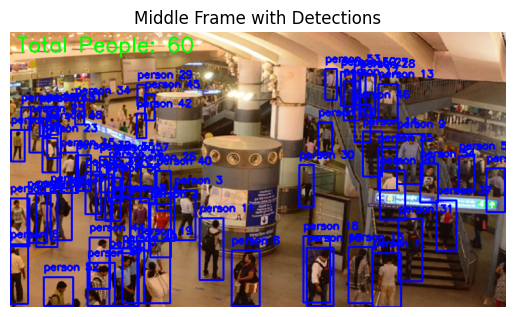

In [3]:
import cv2
import os
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load the YOLO model
model = YOLO('C:/Users/chira/Desktop/best_best_2/train_tuned/weights/best.pt')

# Set the input video or image source
video_source = 'C:/Users/chira/Desktop/best_best/test_new/23.png'  # Update this path for image or video

# Check if the input is a video or an image
if os.path.isfile(video_source) and video_source.lower().endswith(('.jpg', '.png', '.jpeg')):
    # Process as an image
    middle_frame = cv2.imread(video_source)
else:
    # Process as a video
    cap = cv2.VideoCapture(video_source)

    if not cap.isOpened():
        print("Error: Could not open video source.")
        exit()

    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    middle_frame_index = total_frames // 2

    for current_frame_index in range(total_frames):
        ret, frame = cap.read()
        if not ret:
            print("Error: Could not read frame. Exiting...")
            exit()
        if current_frame_index == middle_frame_index:
            middle_frame = frame
            break

    cap.release()

# Ensure a frame is captured
if middle_frame is None:
    print("Error: Could not capture a valid frame.")
    exit()

# Perform inference
results = model(middle_frame)

# Initialize counters
person_count = 0

# Process predictions
for result in results:
    for box in result.boxes:
        if box.conf >= 0.5:  # Confidence threshold
            class_id = int(box.cls)
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            if class_id == 0:  # Person class
                person_count += 1
                cv2.rectangle(middle_frame, (x1, y1), (x2, y2), (255, 0, 0), 2)
                cv2.putText(middle_frame, f'person {person_count}', (x1, y1 - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

# Add total count to the frame
cv2.putText(middle_frame, f'Total People: {person_count}', (10, 30),
            cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

# Display the frame
middle_frame_rgb = cv2.cvtColor(middle_frame, cv2.COLOR_BGR2RGB)
plt.imshow(middle_frame_rgb)
plt.axis('off')
plt.title('Middle Frame with Detections')
plt.show()
